In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [76]:
# Part 1: Camera radiometric calibration
# 1.1 Read the Original Picture,crop out a central portion of each images

In [77]:
import sys
import PIL
from PIL import Image
import os
dirListing = os.listdir('./calibration/')
list_im = []
for item in dirListing:
        list_im.append('./calibration/'+item)
   

In [78]:
print(list_im)

['./calibration/8.JPG', './calibration/9.JPG', './calibration/10.JPG', './calibration/4.JPG', './calibration/5.JPG', './calibration/7.JPG', './calibration/6.JPG', './calibration/2.JPG', './calibration/3.JPG', './calibration/1.JPG']


In [79]:
for i in list_im:
    if i == "./calibration/.DS_Store":continue
    else:
        img = cv2.imread(i)
        #print(i)
        cropped = img[1500:1600, 2000:2100]
        filename = i.replace("calibration","crop")
        #print(filename)
        cv2.imwrite(filename,cropped)

In [80]:
#split the crop image into RGB image
for i in range (1,11):
    filename = "./crop/" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./cropB/" + str(i) + ".jpg"
    filenameR = "./cropR/" + str(i)  + ".jpg"
    filenameG = "./cropG/" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)



In [81]:
# 1.2 break down the original image into RGB channel

In [82]:
# average brighterness value

In [83]:
B = []
G = []
R = []
for i in range (1,8):
    filenameB = "./cropB/" + str(i) + ".jpg"
    filenameR = "./cropR/" + str(i)  + ".jpg"
    filenameG = "./cropG/" + str(i)  + ".jpg"
    BB = cv2.imread(filenameB)
    GG = cv2.imread(filenameG)
    RR = cv2.imread(filenameR)
    B1=BB[1]
    averageB = np.mean(B1.reshape(-1, 300), axis=1)*3
    c = averageB[0]
    B.append(c)
    
    G1=GG[1]
    averageG = np.mean(G1.reshape(-1, 300), axis=1)*3
    d = averageG[0]
    G.append(d)
    
    R1=RR[1]
    averageR = np.mean(R1.reshape(-1, 300), axis=1)*3
    e = averageR[0]
    R.append(e)
 

In [84]:
# RGB vs T

In [85]:
import matplotlib.pyplot as plt

In [86]:
T = [1/45,1/60,1/80,1/90,1/125,1/250,1/350]

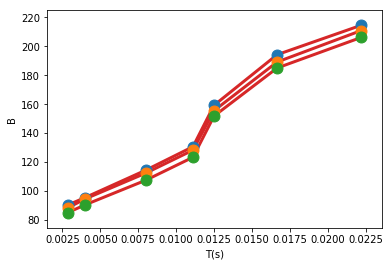

In [87]:
#plt.plot([x, y, 'ro')])
plt.plot(T, B, 'C3', zorder=1, lw=3)
plt.scatter(T, B, s=120, zorder=2)
plt.plot(T, G, 'C3', zorder=1, lw=3)
plt.scatter(T, G, s=120, zorder=2)
plt.plot(T, R, 'C3', zorder=1, lw=3)
plt.scatter(T, R, s=120, zorder=2)
plt.xlabel('T(s)')
plt.ylabel('B')
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [88]:
from math import log
B_log=[log(y,10) for y in B]
G_log=[log(y,10) for y in G]
R_log=[log(y,10) for y in R]
T_log=[log(y,10) for y in T]

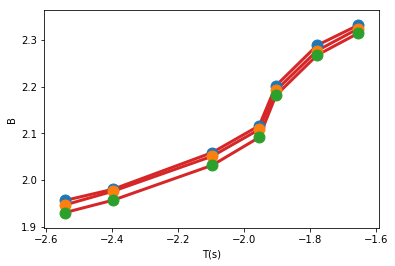

In [89]:
plt.plot(T_log, B_log, 'C3', zorder=1, lw=3)
plt.scatter(T_log, B_log, s=120, zorder=2)
plt.plot(T_log, G_log, 'C3', zorder=1, lw=3)
plt.scatter(T_log, G_log, s=120, zorder=2)
plt.plot(T_log, R_log, 'C3', zorder=1, lw=3)
plt.scatter(T_log, R_log, s=120, zorder=2)
plt.xlabel('T(s)')
plt.ylabel('B')
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [90]:
x= np.asarray(T_log)
y= np.asarray(R_log)
yG= np.asarray(G_log)
yB= np.asarray(B_log)

Text(0,0.5,'log B')

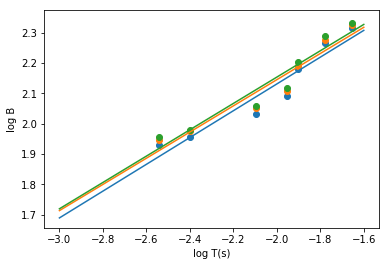

In [91]:
from sklearn.linear_model import LinearRegression
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

# Red channel
modelR = LinearRegression(fit_intercept=True)

modelR.fit(x[:, np.newaxis], y)

xfit = np.linspace(-3, -1.6, 100)
yfit = modelR.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

#Blue channel
modelB = LinearRegression(fit_intercept=True)

modelB.fit(x[:, np.newaxis], yG)

xfit = np.linspace(-3, -1.6, 100)
yfitG = modelB.predict(xfit[:, np.newaxis])

plt.scatter(x, yG)
plt.plot(xfit, yfitG)



#Green channel
modelG = LinearRegression(fit_intercept=True)

modelG.fit(x[:, np.newaxis], yB)

xfit = np.linspace(-3, -1.6, 100)
yfitB = modelG.predict(xfit[:, np.newaxis])

plt.scatter(x, yB)
plt.plot(xfit, yfitB)

plt.legend(('histogram'), loc = 'upper left')

plt.xlabel('log T(s)')
plt.ylabel('log B')

In [92]:
print("ModelR slope:    ", modelR.coef_[0])
print("ModelR intercept:", modelR.intercept_)

ModelR slope:     0.44214674916190294
ModelR intercept: 3.0152553537932927


In [93]:
print("ModelG slope:    ", modelG.coef_[0])
print("ModelG intercept:", modelG.intercept_)

ModelG slope:     0.4346445951096136
ModelG intercept: 3.0228562663092946


In [94]:
print("ModelB slope:    ", modelB.coef_[0])
print("ModelB intercept:", modelB.intercept_)

ModelB slope:     0.4321506687088642
ModelB intercept: 3.0093673050928533


In [95]:
oneOverG = [modelR.intercept_, modelG.intercept_, modelB.intercept_]

In [96]:
print(oneOverG)

[3.0152553537932927, 3.0228562663092946, 3.0093673050928533]


In [97]:
g = [1/modelR.intercept_, 1/modelG.intercept_, 1/modelB.intercept_]

In [98]:
print(g)

[0.3316468698884711, 0.33081295036926556, 0.3322957614072787]


In [99]:
R_real = R**oneOverG[0]
G_real = G**oneOverG[1]
B_real = B**oneOverG[2]

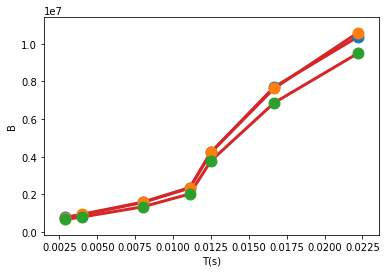

In [100]:
plt.plot(T, B_real, 'C3', zorder=1, lw=3)
plt.scatter(T, B_real, s=120, zorder=2)
plt.plot(T, G_real, 'C3', zorder=1, lw=3)
plt.scatter(T, G_real, s=120, zorder=2)
plt.plot(T, R_real, 'C3', zorder=1, lw=3)
plt.scatter(T, R_real, s=120, zorder=2)
plt.xlabel('T(s)')
plt.ylabel('B')
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [101]:
# Part 2: Acquire a picture stack

In [108]:
import os
dirListing = os.listdir('./HDRO/')
list_HDR = []
for item in dirListing:
        list_HDR.append('./HDRO/'+item)

In [109]:
print(list_HDR)

['./HDRO/.DS_Store', './HDRO/1_60.JPG', './HDRO/1_251.JPG', './HDRO/1_2037.JPG']


In [110]:
del list_HDR[0]

In [111]:
print(list_HDR)

['./HDRO/1_60.JPG', './HDRO/1_251.JPG', './HDRO/1_2037.JPG']


In [112]:
for i in range (1,4):
    filename = "./HDRO/" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./HDROB/" + str(i) + ".jpg"
    filenameR = "./HDROR/" + str(i)  + ".jpg"
    filenameG = "./HDROG/" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)




BB 1


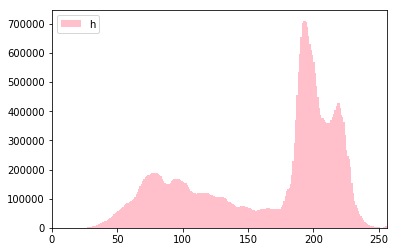

GG 1


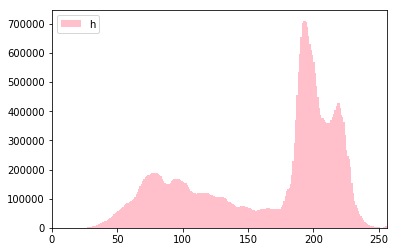

RR 1


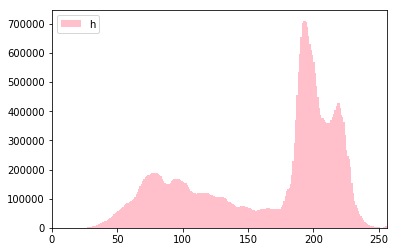

BB 2


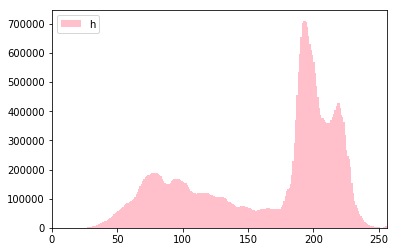

GG 2


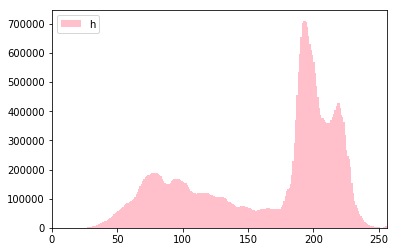

RR 2


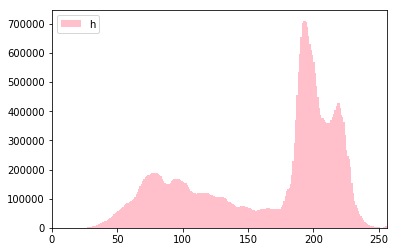

BB 3


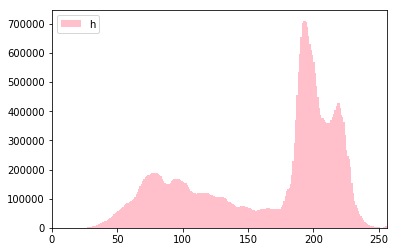

GG 3


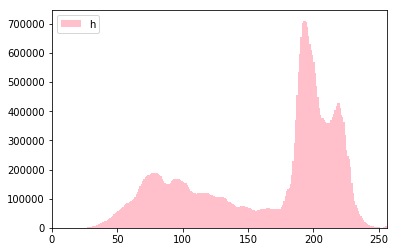

RR 3


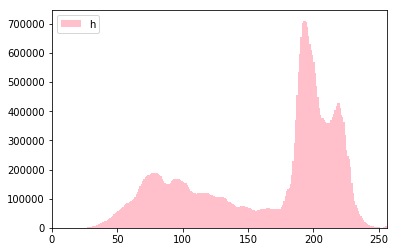

In [118]:

for i in range (1,4):
    filenameB = "./HDROB/" + str(i) + ".jpg"
    filenameR = "./HDROR/" + str(i)  + ".jpg"
    filenameG = "./HDROG/" + str(i)  + ".jpg"
    BB = cv2.imread(filenameB)
    GG = cv2.imread(filenameG)
    RR = cv2.imread(filenameR)
    print("BB",i)
    hist,bins = np.histogram(BB.flatten(),256,[0,256])
    plt.hist(img.flatten(),256,[0,256], color = 'pink')
    plt.xlim([0,256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()
    
    print("GG",i)
    hist,bins = np.histogram(GG.flatten(),256,[0,256])
    plt.hist(img.flatten(),256,[0,256], color = 'pink')
    plt.xlim([0,256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()
    
    
    print("RR",i)
    hist,bins = np.histogram(RR.flatten(),256,[0,256])
    plt.hist(img.flatten(),256,[0,256], color = 'pink')
    plt.xlim([0,256])
    plt.legend(('histogram'), loc = 'upper left')
    plt.show()

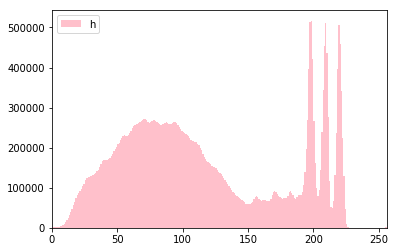

In [16]:
hist,bins = np.histogram(BB.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'pink')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

[[200 200 200 ... 197 197 197]
 [199 199 199 ... 196 196 196]
 [198 198 198 ... 194 194 194]
 ...
 [197 197 197 ... 195 195 195]
 [196 196 196 ... 195 195 195]
 [196 196 196 ... 196 196 196]]


In [21]:
# Part 3: Create a composite image

['./calibration/1.jpeg', './calibration/6.jpeg', './calibration/7.jpeg', './calibration/8.jpeg', './calibration/4.jpeg', './calibration/5.jpeg', './calibration/2.jpeg', './calibration/3.jpeg']
